### Задача 2.1

In [56]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

Генерируем выборку из равномерного распределения на отрезке $[0,\theta]$ размера $N = 10000$

In [57]:
tetas = np.array([1,5,10,1000])
teta = 1.0 #параметр распредения
a =np.zeros((tetas.size, 10000))
for j in range(tetas.size):
    uniform = st.uniform(loc=0, scale=tetas[j])
    a[j] = uniform.rvs(size=10000)

1) Считаем оценку $2\overline{X}$.

In [58]:
stat1 = np.zeros((tetas.size, 10001))
for j in range(tetas.size):
    for i in range(1,10001):
        stat1[j][i] = 2*np.mean(a[j][:i])
print (stat1[:, 10000])

[  1.00815368   4.96003174   9.97514837 993.02444629]


2) Считаем оценку $\overline{X} + \frac{X_{(n)}}{2}$.

In [59]:
stat2 = np.zeros((tetas.size, 10001))
for j in range(tetas.size):
    for i in range(1,10001):
        stat2[j][i] = np.mean(a[j][:i]) + np.amax(a[j][:i])/2.0
print (stat2[:, 10000])

[  1.00406676   4.9796557    9.98753204 996.50211547]


3) Считаем оценку $(n+1)X_{(1)}$.

In [60]:
stat3 = np.zeros((tetas.size, 10001))
for j in range(tetas.size):
    for i in range(1,10001):
        stat3[j][i] = (i+1.0)*np.amin(a[j][:i])
print (stat3[0, 10000])

3.359930538789815


4) Считаем оценку $X_{(1)} + X_{(n)}$.

In [61]:
stat4 = np.zeros((tetas.size, 10001))
for j in range(tetas.size):
    for i in range(1,10001):
        stat4[j][i] = np.amin(a[j][:i]) + np.amax(a[j][:i])
print (stat4[:, 10000])

[   1.0003158     4.9992865    10.00077907 1000.12582784]


5) Считаем оценку $\frac{n+1}{n}X_{(n)}$.

In [62]:
stat5 = np.zeros((tetas.size, 10001))
for j in range(tetas.size):
    for i in range(1,10001):
        stat5[j][i] = (i+1.0)/i * np.amax(a[j][:i])
print (stat5[:, 10000])

[   1.00007984    4.99977958   10.0009157  1000.07978263]


Заметим, что оценка $(n+1)X_{1}$ сильно отличается от истинного значения параметра $\theta$, при фиксированом $n$. Что объясняется ее несостоятельностью.

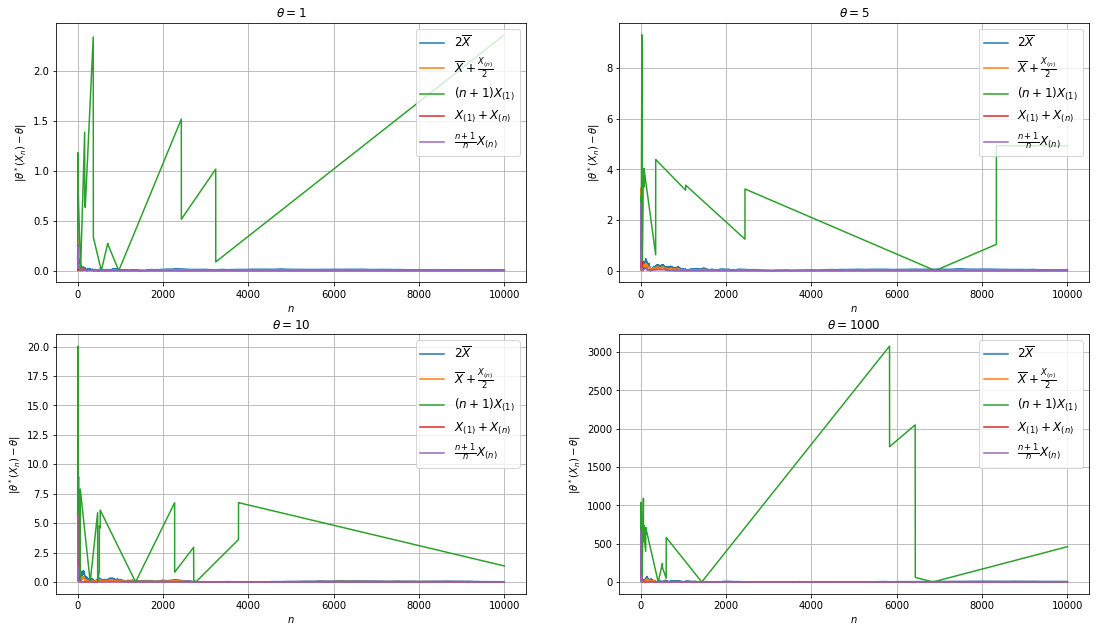

In [63]:
for j in range(tetas.size):
    plt.subplot (2, 2, j+1)
    plt.plot(np.arange(1,10001), abs(stat1[j] - tetas[j])[1:], label = r'$2\overline{X}$')
    plt.plot(np.arange(1,10001), abs(stat2[j] - tetas[j])[1:], label = r'$\overline{X} + \frac{X_{(n)}}{2}$')
    plt.plot(np.arange(1,10001), abs(stat3[j] - tetas[j])[1:], label = r'$(n+1)X_{(1)}$')
    plt.plot(np.arange(1,10001), abs(stat4[j] - tetas[j])[1:], label = r'$X_{(1)} + X_{(n)}$')
    plt.plot(np.arange(1,10001), abs(stat5[j] - tetas[j])[1:], label = r'$\frac{n+1}{n}X_{(n)}$')
    plt.legend(fontsize=12, loc=1)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\theta^*(X_{n}) - \theta |$')
    plt.title(r'$\theta = $' + str(tetas[j])) 
    plt.grid(True)
    #plt.ylim (0.04, 1.00)
    fig.set_size_inches(18.5, 10.5)
    fig = plt.gcf()
plt.show()

Оценка $2\overline{X}$ и оценка $\overline{X} + \frac{X_{(n)}}{2}$ сильнее отличаются от оставшихся оценок.

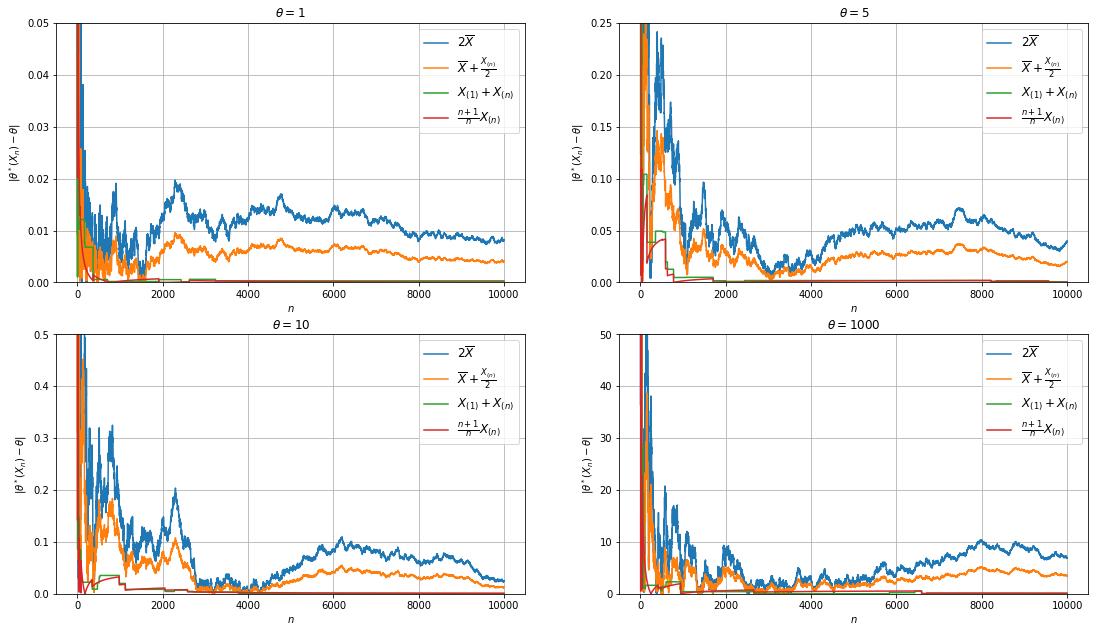

In [64]:
for j in range(tetas.size):
    plt.subplot (2, 2, j+1)
    plt.plot(np.arange(1,10001), abs(stat1[j] - tetas[j])[1:], label = r'$2\overline{X}$')
    plt.plot(np.arange(1,10001), abs(stat2[j] - tetas[j])[1:], label = r'$\overline{X} + \frac{X_{(n)}}{2}$')
    #plt.plot(np.arange(1,10001), abs(stat3[j] - tetas[j])[1:], label = r'$(n+1)X_{(1)}$')
    plt.plot(np.arange(1,10001), abs(stat4[j] - tetas[j])[1:], label = r'$X_{(1)} + X_{(n)}$')
    plt.plot(np.arange(1,10001), abs(stat5[j] - tetas[j])[1:], label = r'$\frac{n+1}{n}X_{(n)}$')
    plt.legend(fontsize=12, loc=1)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\theta^*(X_{n}) - \theta |$')
    plt.title(r'$\theta = $' + str(tetas[j])) 
    plt.grid(True)
    plt.ylim (0.0, 0.05*tetas[j])
    fig.set_size_inches(18.5, 10.5)
    fig = plt.gcf()
plt.show()

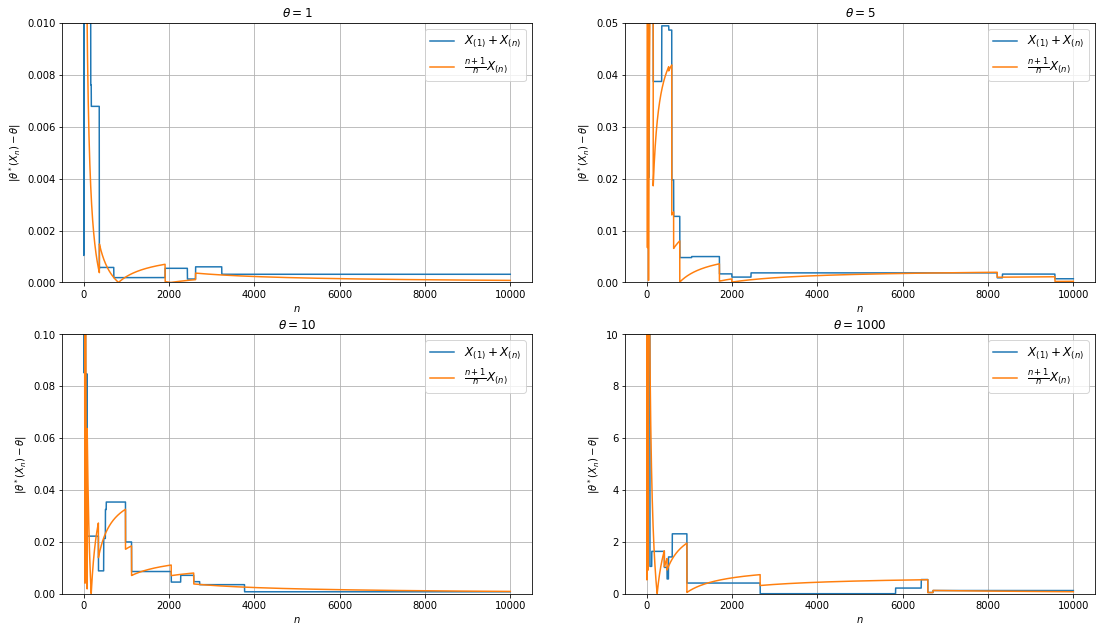

In [65]:
for j in range(tetas.size):
    plt.subplot (2, 2, j+1)
    #plt.plot(np.arange(1,10001), abs(stat1[j] - tetas[j])[1:], label = r'$2\overline{X}$')
    #plt.plot(np.arange(1,10001), abs(stat2[j] - tetas[j])[1:], label = r'$\overline{X} + \frac{X_{(n)}}{2}$')
    #plt.plot(np.arange(1,10001), abs(stat3[j] - tetas[j])[1:], label = r'$(n+1)X_{(1)}$')
    plt.plot(np.arange(1,10001), abs(stat4[j] - tetas[j])[1:], label = r'$X_{(1)} + X_{(n)}$')
    plt.plot(np.arange(1,10001), abs(stat5[j] - tetas[j])[1:], label = r'$\frac{n+1}{n}X_{(n)}$')
    plt.legend(fontsize=12, loc=1)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\theta^*(X_{n}) - \theta |$')
    plt.title(r'$\theta = $' + str(tetas[j])) 
    plt.grid(True)
    plt.ylim (0.0, 0.01*tetas[j])
    fig.set_size_inches(18.5, 10.5)
    fig = plt.gcf()
plt.show()

### Вывод

Оценка параметра называется несмещенной, если математическое ожидание оценки равно самому параметру. Проведенные
эксперименты, действительно, наглядно демонмтрируют справедливость этого свойства, так как среднее значение именно несмещенных
оценок довольно близко к истинному значению параметра, в отличие от смещенных. Разумеется, с увеличением размера выборки это
становится более наглядным.
По УЗБЧ имеем $2\overline{X} \rightarrow \theta$ При $n \rightarrow \inf$ почти наверно для $P_{\theta}$.
$X_{(1)} \rightarrow 0$, $X_{(n)} \rightarrow \theta$ по распределению (Доказывается через т.Александрова)
А $P_{\theta}(|(n+1)X_{(1)}-\theta|> \varepsilon) = -e^{-\frac{\theta-\varepsilon}{\theta}} \neq 0$ что означает что оценка не является состоятельной.
Соответственно, что мы и наблюдали на графиках.
Самой лучшой оценкой оказалось $\frac{n+1}{n}X_{(n)}$ и как мы далее узнаем эта оценка лучше других в равномерном подходе с квадратичной функцией потерь.